# Neural Networks on MNIST data

In [72]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import torch
from IPython.core.debugger import set_trace

In [74]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [75]:
# !ln -s /home/ec2-user/data/mnist/ mnist creating symlink

In [76]:
path = 'mnist/'
FILENAME='mnist.pkl.gz'

In [77]:
def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [78]:
((x, y), (x_valid, y_valid), (x_test,y_test)) = load_mnist(path+FILENAME)

len(x), len(y), len(x_valid), len(y_valid), len(x_test),len(y_test)

(50000, 50000, 10000, 10000, 10000, 10000)

We have 50000 images in train. 10000 images in validation and test data. There are 10 classes

## Normalization

##### Normalization is better when feeding data to neural networks. RF is not affected by scale so not required. But neural networks are affected by scale otherwise NN has to learn the mean and std by itself.

In [79]:
mean = x.mean()

std = x.std()

x = (x -mean)/std

mean,std,x.mean(),x.std()

(0.13044983, 0.30728981, -3.1638146e-07, 0.99999934)

### Note on normalization:
* Train and validation should have same normalization
* For RGB image,normalization for each channel
* Structural: Normalization for each fetaure separately

##### Same normalization has to applied to validation/test data

In [80]:
x_valid = (x_valid-mean)/std

In [81]:
x_valid.mean(),x_valid.std()

(-0.0058509219, 0.99243325)

In [82]:
x_valid.shape

(10000, 784)

### Reshaping your tensors

In [83]:
x_valid.reshape(-1, 28,28).shape #-1 is entered as reshape will identify by itself what is that order based on input

(10000, 28, 28)

In [84]:
x_imgs = x_valid.reshape(-1,28,28) #store 10000 images as matrix of 28*28

In [85]:
def img_show(img,title = None):
    plt.imshow(img,cmap='gray')
    if title is not None: plt.title(title) 

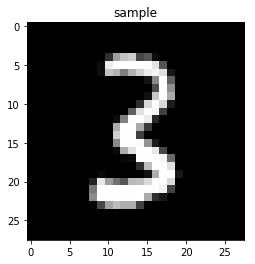

In [86]:
img_show(x_imgs[0],"sample") #this will pick the first image

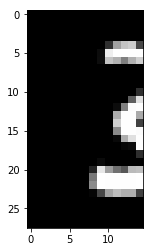

In [87]:
img_show(x_imgs[0,0:28,0:15]) #indexing into the image and grabbing a portion of the image

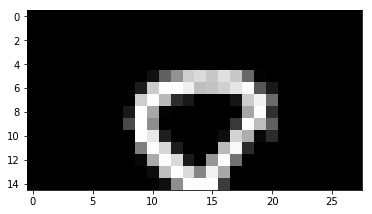

In [88]:
img_show(x_imgs[1,0:15,])

##### len will return the length of the 1st dimension

In [89]:
len(x_imgs) 

10000

In [90]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

## Neural Nets with Pytorch

In [91]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *
import torch.nn as nn
import torch
from torch.autograd import Variable

In [92]:
d = torch.randn(2,3);d #creating a tensor of size 2*3


 0.7845  0.5364 -0.9377
 1.0456  0.0028 -1.9463
[torch.FloatTensor of size 2x3]

### Creating neural network, the easiest way

In [93]:
net1 = nn.Sequential(
nn.Linear(28*28,10,bias=True), #assuming input the network is number of images * 784, 
    #output of this layer will be number of images * 10
nn.LogSoftmax()).cuda()

##### We'll now look at how each layer behaves

#### Looking at the linear layer

In [94]:
a = nn.Linear(2*2,2);a

Linear (4 -> 2)

In [95]:
a.weight,a.bias #these are randomly initialized

(Parameter containing:
 -0.1734 -0.3228 -0.0492  0.0387
  0.4049  0.2730  0.0341  0.0732
 [torch.FloatTensor of size 2x4], Parameter containing:
  0.4362
  0.1007
 [torch.FloatTensor of size 2])

In [96]:
b = torch.autograd.Variable(torch.randn(5,4));x #sample input

array([[-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
       ..., 
       [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, ..., -0.42452, -0.42452, -0.42452]], dtype=float32)

In [97]:
a(b) #it applies the linear layer on the sample input defined

Variable containing:
 0.9771 -0.6110
 0.5063 -0.1106
 1.0230 -0.6426
 0.4891 -0.0155
 0.5434 -0.1464
[torch.FloatTensor of size 5x2]

#### Looking at the softmax function

In [98]:
m = nn.LogSoftmax().cuda()

In [99]:
b #sample input: assume 5 images of 2*2 size flattened out

Variable containing:
-1.0077 -0.8044 -2.2477 -0.1020
-0.5555 -0.0729  1.0034 -0.0092
-1.2558 -0.9903 -0.4559  0.6978
 0.1749 -0.2908 -0.6908 -1.1489
-0.7753  0.1469 -0.0904  0.4073
[torch.FloatTensor of size 5x4]

In [100]:
o = m(b);o #applying logsoftmax to x

Variable containing:
-1.6071 -1.4038 -2.8472 -0.7014
-2.2083 -1.7257 -0.6495 -1.6621
-2.4496 -2.1841 -1.6497 -0.4960
-0.8392 -1.3049 -1.7050 -2.1631
-2.1704 -1.2481 -1.4854 -0.9878
[torch.FloatTensor of size 5x4]

In [101]:
c = torch.exp(o);c #visualize what happens before the log....each row is an image with probabilities for 4 classes

Variable containing:
 0.2005  0.2457  0.0580  0.4959
 0.1099  0.1780  0.5223  0.1897
 0.0863  0.1126  0.1921  0.6090
 0.4321  0.2712  0.1818  0.1150
 0.1141  0.2870  0.2264  0.3724
[torch.FloatTensor of size 5x4]

In [102]:
c.sum(dim = 1) #if we sum probabilities for each row it should comes out to be 1 as expected

Variable containing:
 1.0000
 1.0000
 1.0000
 1.0000
 1.0000
[torch.FloatTensor of size 5]

#### Passing the MNIST data to our net

In [103]:
md = ImageClassifierData.from_arrays(path,(x,y),(x_valid,y_valid))

loss = nn.NLLLoss() #calculate cross entropy
metrics = [accuracy] #calculate accuracy based on predicted labels
opt = optim.Adam(net1.parameters()) #default lr = 1e-3

#### Understanding how loss function works

In [104]:
m = nn.LogSoftmax().cuda() #output of log softmax: predicted log - probabilities

In [105]:
input = torch.autograd.Variable(torch.randn(3, 5), requires_grad=True);input 

Variable containing:
-0.9238  0.4262 -1.0698 -0.6394 -2.6280
 0.5432  0.9659 -0.6621 -0.3380  0.4755
 0.4789  0.7487 -0.2939 -0.2421 -0.9753
[torch.FloatTensor of size 3x5]

In [106]:
target = torch.autograd.Variable(torch.LongTensor([1,0,4]));target #actual classes for the images

Variable containing:
 1
 0
 4
[torch.LongTensor of size 3]

In [107]:
loss(m(input),target)

Variable containing:
 1.5873
[torch.FloatTensor of size 1]

#### Understanding the parameters of the network

##### Parameters are special variables that need to be optimized

In [108]:
#print the weight and bias that is initialized for the network
for param in net1.parameters():
    print(param.data,param.size())


1.00000e-02 *
 1.9912  0.8432 -0.9445  ...   0.2809  2.1917  1.8624
 1.3687  2.8425 -2.6938  ...  -2.0800 -0.1864 -3.3436
-1.6948  2.7689 -2.5999  ...  -0.0838 -3.1068 -0.5627
          ...             ⋱             ...          
 2.6478  1.3146 -0.5869  ...   3.3794 -0.3767 -3.0574
-1.4609  2.0613 -2.9140  ...  -0.3334  2.3576 -3.0867
 0.0216  2.1639  2.1579  ...  -1.2679 -2.0052  2.2693
[torch.cuda.FloatTensor of size 10x784 (GPU 0)]
 torch.Size([10, 784])

1.00000e-02 *
 -1.8134
  2.1217
 -2.1635
  0.6267
  3.1942
  2.7462
 -2.2247
  2.3428
  1.7663
 -3.5645
[torch.cuda.FloatTensor of size 10 (GPU 0)]
 torch.Size([10])


#### Network training 

In [109]:
fit(net1,md,opt=opt,epochs=3,crit=loss, metrics = metrics) #accuracy is calculated on validation

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 14%|█▍        | 112/782 [00:01<00:07, 86.01it/s, loss=0.596]


 27%|██▋       | 212/782 [00:01<00:05, 113.94it/s, loss=0.417]


 42%|████▏     | 331/782 [00:02<00:03, 145.68it/s, loss=0.367]


 57%|█████▋    | 449/782 [00:02<00:01, 167.33it/s, loss=0.343]


 73%|███████▎  | 569/782 [00:03<00:01, 183.88it/s, loss=0.336]


 88%|████████▊ | 687/782 [00:03<00:00, 194.78it/s, loss=0.346]


 99%|█████████▊| 772/782 [00:03<00:00, 203.37it/s, loss=0.311]
                                                              [ 0.       0.31058  0.29241  0.9163 ]

  6%|▋         | 49/782 [00:00<00:08, 88.76it/s, loss=0.305]


 19%|█▉        | 151/782 [00:01<00:06, 91.08it/s, loss=0.306]


 36%|███▋      | 284/782 [00:02<00:03, 133.75it/s, loss=0.309]


 49%|████▉     | 386/782 [00:02<00:02, 147.58it/s, loss=0.317]


 65%|██████▌   | 512/782 [00:03<00:01, 165.31it/s, loss=0.3]  


 82%|████████▏ | 641/782 [00:03<00:00, 179.43it/s, loss=0.289]


 95%|█████████▌| 745/782 [00:04<00:00, 183.66it/s, loss=0.289]


 98%|█████████▊| 770/782 [00:04<00:00, 186.08it/s, loss=0.275]
                                                              [ 1.       0.27458  0.27277  0.92496]

 11%|█▏        | 88/782 [00:01<00:08, 77.37it/s, loss=0.286]


 24%|██▍       | 187/782 [00:01<00:06, 98.73it/s, loss=0.287]


 42%|████▏     | 327/782 [00:02<00:03, 139.45it/s, loss=0.286]


 58%|█████▊    | 451/782 [00:02<00:02, 158.36it/s, loss=0.289]


 71%|███████   | 553/782 [00:03<00:01, 165.67it/s, loss=0.294]


 88%|████████▊ | 685/782 [00:03<00:00, 180.22it/s, loss=0.285]


 98%|█████████▊| 763/782 [00:04<00:00, 182.52it/s, loss=0.269]
                                                              [ 2.       0.26938  0.27596  0.92188]



In [110]:
set_lrs(opt,1e-2) #you can change the learning rate

##### learning rate annealing: When the accuracy is not changing much...one step could be higher learning rate so decrease that

In [111]:
fit(net1,md,opt=opt,epochs=3,crit=loss, metrics = metrics)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 14%|█▍        | 110/782 [00:01<00:08, 82.82it/s, loss=0.552]


 27%|██▋       | 211/782 [00:01<00:05, 106.56it/s, loss=0.624]


 43%|████▎     | 334/782 [00:02<00:03, 135.04it/s, loss=0.598]


 59%|█████▉    | 460/782 [00:02<00:02, 155.44it/s, loss=0.649]


 75%|███████▌  | 587/782 [00:03<00:01, 170.47it/s, loss=0.621]


 88%|████████▊ | 687/782 [00:03<00:00, 174.63it/s, loss=0.571]


 98%|█████████▊| 766/782 [00:04<00:00, 182.15it/s, loss=0.627]
                                                              [ 0.       0.62681  0.50286  0.90078]

  6%|▌         | 44/782 [00:00<00:09, 81.11it/s, loss=0.52] 


 18%|█▊        | 140/782 [00:01<00:07, 84.03it/s, loss=0.569]


 33%|███▎      | 259/782 [00:02<00:04, 124.44it/s, loss=0.548]


 51%|█████     | 396/782 [00:02<00:02, 155.74it/s, loss=0.616]


 64%|██████▍   | 502/782 [00:03<00:01, 166.76it/s, loss=0.609]


 80%|████████  | 629/782 [00:03<00:00, 179.23it/s, loss=0.634]


 97%|█████████▋| 756/782 [00:03<00:00, 189.33it/s, loss=0.547]


100%|█████████▉| 781/782 [00:04<00:00, 191.07it/s, loss=0.501]
                                                              [ 1.       0.50114  0.60199  0.88018]

 12%|█▏        | 91/782 [00:01<00:08, 85.16it/s, loss=0.549]


 25%|██▌       | 197/782 [00:01<00:05, 107.81it/s, loss=0.546]


 40%|████      | 313/782 [00:02<00:03, 139.00it/s, loss=0.537]


 55%|█████▍    | 428/782 [00:02<00:02, 157.92it/s, loss=0.567]


 72%|███████▏  | 561/782 [00:03<00:01, 175.63it/s, loss=0.522]


 88%|████████▊ | 687/782 [00:03<00:00, 186.45it/s, loss=0.579]


 97%|█████████▋| 762/782 [00:04<00:00, 186.75it/s, loss=0.57] 
                                                             [ 2.       0.57015  0.51753  0.90048]



#### Prediction 

In [112]:
preds_logp = predict(net1,md.val_dl)

In [113]:
preds_logp.shape

(10000, 10)

In [114]:
preds_logp #these are log probabilities

array([[-23.27872,  -8.36032,  -4.69068, ..., -40.93416,  -2.31111, -22.26012],
       [-31.47261, -25.23961, -11.26887, ..., -26.39099,  -0.00257, -16.61382],
       [-13.93845, -39.93703, -14.91314, ..., -26.13324, -20.73479, -28.46778],
       ..., 
       [-30.21282, -26.51197, -30.03049, ..., -30.65809, -10.17495, -20.34974],
       [-16.38731, -34.5769 , -23.22212, ..., -23.42793, -23.30922, -20.2347 ],
       [ -5.86007, -29.50163, -16.88419, ..., -20.92992,  -0.01184,  -6.74992]], dtype=float32)

In [115]:
preds = preds_logp.argmax(axis=1) #converting them to labels

In [116]:
preds.shape,preds #class prediction for each image

((10000,), array([3, 8, 6, ..., 5, 6, 8]))

In [117]:
np.mean(preds == md.val_y) # accuracy calculation

0.90000000000000002

---

### Building it from scratch with minimum use of pytorch inbuilt functions

In [118]:
def get_params(*dims): return nn.Parameter(torch.randn(dims)/dims[0])

class custom_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = get_params(28*28,10) #creating weight matrix
        self.b = get_params(10) #creating bias matrix
    def forward(self,x):
        set_trace()
        x = x.view(x.size(0),-1) #flattens the input matrix
        x = x@self.w + self.b #applying the linear layer
        x = torch.log(torch.exp(x)/torch.exp(x).sum(dim = 0)) #applying logsoftmax
        return x

net2 = custom_net().cuda()

In [ ]:
net2.l1_b.size()

In [ ]:
opt = optim.Adam(net2.parameters(),lr=1e-3)

fit(data=md,model=net2,crit=loss,epochs=3,metrics=metrics,opt=opt)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  0%|          | 0/782 [00:00<?, ?it/s]> <ipython-input-118-e1bacce060e6>(10)forward()
      8     def forward(self,x):
      9         set_trace()
---> 10         x = x.view(x.size(0),-1) #flattens the input matrix
     11         x = x@self.w + self.b #applying the linear layer
     12         x = torch.log(torch.exp(x)/torch.exp(x).sum(dim = 0)) #applying logsoftmax

ipdb> !x
Variable containing:
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

ipdb> step
--Call--
> /home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/autograd/variable.py(62)__getattr__()
     60     }
     61 
---> 62     def

ipdb> !x@self.w
Variable containing:
 0.0250  0.0265 -0.0142 -0.0143 -0.0174  0.0554 -0.0699  0.0127 -0.0115  0.0613
 0.0206 -0.0136 -0.0729  0.0073  0.0305  0.0064 -0.0261  0.0043 -0.0319 -0.0153
 0.0278 -0.0065 -0.0609  0.0416 -0.0394 -0.0575 -0.0232 -0.0596  0.0254 -0.0352
 0.0163 -0.0561 -0.0290  0.0566  0.0008  0.0379 -0.0061  0.0062  0.0206 -0.0245
 0.0323  0.0270  0.0095 -0.0299  0.0121 -0.0365 -0.0737 -0.0467 -0.0328 -0.0414
 0.0198  0.0202 -0.0012 -0.0155 -0.0220  0.0171 -0.0616 -0.0046 -0.0455  0.0394
 0.0465  0.0549 -0.0910 -0.0123  0.0063  0.0164 -0.0284 -0.0230 -0.0028  0.0141
-0.0029  0.0247 -0.0292 -0.0009 -0.0102 -0.0688 -0.0449 -0.0011 -0.0135 -0.0050
-0.0111 -0.0402 -0.0464 -0.0431 -0.0681  0.0156 -0.0256 -0.0232 -0.0411  0.0170
-0.0028  0.0317 -0.0237  0.0569  0.0083 -0.0296 -0.0385 -0.0047  0.0057 -0.0056
-0.0308  0.0194 -0.0329 -0.0275  0.0002  0.0290 -0.1179  0.0152 -0.0374  0.0105
 0.0143  0.0159 -0.0121  0.0199 -0.0164 -0.0333 -0.0388  0.0303 -0.0283  0.0047
-0.

ipdb> !self.b
Parameter containing:
 0.0102
-0.0151
 0.0208
-0.0230
-0.0762
-0.0944
 0.2553
-0.1873
-0.0034
-0.0942
[torch.cuda.FloatTensor of size 10 (GPU 0)]

ipdb> !x@self.w + self.b
Variable containing:
 0.0352  0.0114  0.0066 -0.0373 -0.0936 -0.0390  0.1854 -0.1746 -0.0149 -0.0329
 0.0309 -0.0287 -0.0522 -0.0157 -0.0456 -0.0880  0.2292 -0.1829 -0.0353 -0.1095
 0.0380 -0.0216 -0.0401  0.0185 -0.1156 -0.1519  0.2321 -0.2469  0.0220 -0.1294
 0.0265 -0.0711 -0.0082  0.0336 -0.0753 -0.0565  0.2492 -0.1810  0.0173 -0.1187
 0.0425  0.0119  0.0303 -0.0529 -0.0640 -0.1309  0.1816 -0.2339 -0.0361 -0.1356
 0.0300  0.0051  0.0196 -0.0386 -0.0981 -0.0773  0.1937 -0.1918 -0.0489 -0.0547
 0.0567  0.0399 -0.0703 -0.0353 -0.0699 -0.0780  0.2269 -0.2103 -0.0062 -0.0801
 0.0073  0.0096 -0.0085 -0.0240 -0.0864 -0.1632  0.2104 -0.1883 -0.0169 -0.0992
-0.0009 -0.0553 -0.0256 -0.0662 -0.1443 -0.0788  0.2298 -0.2105 -0.0445 -0.0772
 0.0074  0.0166 -0.0030  0.0338 -0.0678 -0.1240  0.2169 -0.1920  0.0023 -

In [ ]:
t = [o.numel() for o in net.parameters()] #to get number of elements in each layer: weights and bias matrix
t, sum(t)

* When the module is called as function it's forward method is called by default
* Log-probabilities is used for numerical stability

#### Understanding how this is working

In [ ]:
input_ = torch.autograd.Variable(torch.randn(5,2,2)); input_ # 5 images with 2*2 size

In [ ]:
weight = get_params(4,3);weight # classes =3

In [ ]:
bias = get_params(5);bias

In [ ]:
input_ = input_.view(input_.size(0),-1);input_

In [ ]:
k = input_@weight;k

In [ ]:
k.size()

In [ ]:
bias.size()

In [ ]:
k + bias

In [ ]:
bias1 = torch.autograd.Variable(torch.randn(5,1));bias1

In [ ]:
bias1.size()

In [ ]:
k + bias1

## Understanding log softmax

In [ ]:
input_

In [ ]:
weight

In [ ]:
(input_@weight)

In [ ]:
output_linear = (input_@weight)+Variable(torch.randn(5,1))

In [ ]:
output_linear

In [ ]:
torch.exp(output_linear)

In [ ]:
torch.exp(output_linear).sum(dim=0)

In [ ]:
torch.exp(output_linear).sum(dim=1)

In [ ]:
torch.exp(output_linear)/torch.exp(output_linear).sum(dim=1)

In [ ]:
torch.exp(output_linear)/torch.exp(output_linear).sum(dim=1)

#### Passing a batch of training image through the network

In [ ]:
xmb,ymb = next(iter(md.trn_dl)) #you get a batch of 64 images

In [ ]:
vxmb = Variable(xmb).cuda() #creating it as variable

In [ ]:
vxmb

In [ ]:
pred_mb = net2(vxmb).exp();pred_mb #actual probabilities

In [ ]:
pred_mb.max(1)[1].size()#pytorch version of argmax...it returns class and maximum probabilities for each image

In [ ]:
Variable(ymb).cuda().size()

In [ ]:
np.mean(to_np(pred_mb.max(1)[1])==to_np(ymb))

In [ ]:
#deeper nn
net3 = nn.Sequential(
nn.Linear(28*28,100),
nn.ReLU(),
nn.Linear(100,10),
nn.LogSoftmax()).cuda()

opt = optim.Adam(net3.parameters())

fit(data=md,crit=loss,epochs=1,model=net3,metrics=metrics,opt=opt)

### Going further

In [ ]:
net2 = custom_net().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-3
optimizer=optim.Adam(net2.parameters(), lr=learning_rate)

In [ ]:
xt,yt = next(iter(md.trn_dl))

In [ ]:
xt.shape

In [ ]:
ypred = net2(Variable(xt).cuda())

In [ ]:
ypred

In [ ]:
l = loss(ypred,Variable(yt).cuda());l

In [ ]:
optimizer.zero_grad()

In [ ]:
w,b = net2.w,net2.b

In [ ]:
w,b

In [ ]:
l.backward()

In [ ]:
w.grad.data,b.grad.data

In [ ]:
w.data = w.data - w.grad.data*learning_rate

In [ ]:
w

In [ ]:
optimizer.step()

In [ ]:
for param in net2.parameters():
    print(param.data)

In [ ]:
np.mean(to_np(ypred).argmax(axis=1) == to_np(yt))

In [ ]:
def score(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y))/len(y_pred)

In [ ]:
net2 = custom_net().cuda()
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.w,net2.b

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()
        w.data -= w.grad.data * lr
        b.data -= b.grad.data * lr
        
        w.grad.data.zero_()
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))

In [ ]:
w.grad.data

* Regularization: Weight decay or dropout
* Weight decay is similar to L1/L2 regularization but is not exactly the same
* Weight decay either during update or apply regularization in loss function
* But in adam optimizer these 2 are different concepts
* Sometimes weight decay can improve the loss surface 
* Weight decay finally result in relatively poor training loss

## Broadcasting

In [ ]:
a = np.array([1,5,3])
b = np.array([3,4,4])

In [ ]:
a,b

In [ ]:
a+b

In [ ]:
(a>b)*a

In [ ]:
a*b #element wise multiplication

In [ ]:
a = T([1,5,3])
b = T([3,4,4])

In [ ]:
a,b

In [ ]:
a+b

In [ ]:
a>b

In [ ]:
x = np.array([[1,2,3],[3,4,5],[9,1,2]])

In [ ]:
x

In [ ]:
x.shape

In [ ]:
2*x

In [ ]:
np.broadcast_to(2,x.shape)

In [ ]:
y = np.array([10,20,30])

In [ ]:
y.shape

In [ ]:
y

In [ ]:
x+y

In [ ]:
y[None].shape

In [ ]:
y[:,None].shape

In [ ]:
x+y[:,None]

In [ ]:
np.expand_dims(y,1)

In [ ]:
y[None,:,None]

## Broadcasting rules

##### Subtracting mean

In [ ]:
s = y[None]

In [ ]:
t = y[:,None]

In [ ]:
s@t

In [ ]:
s*t

In [ ]:
t@s

In [ ]:
t

In [ ]:
s

In [ ]:
x,y

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
(x@y).shape #empty dim is taken as 1

In [ ]:
(T(x)@T(y)).size()

In [ ]:
T([1,2,3])

In [ ]:
torch.Tensor(5,3).cuda()

Why one epoch is not sufficient?

learning rate annealing

In [ ]:
set_lrs()

In [ ]:
when to use regularization